In [1]:
import csv
import numpy as np
import random
from nupack import *
import pandas as pd
import statistics
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 22})

In [2]:
from rna_inverse import *

# Test on Simple RNA Sequence

First, input the target secondary structure and constraints:

In [4]:
target_structure = '(((((.....))))).....((......))......'
constraints = {}
constraints[1] = 'G'
constraints[8] = 'A'
# Convert constraints to full-list of constraints
constraints = check_sequence_constraints(target_structure, 
                                         constraints)

Next, generate the initial sequence:

In [5]:
_, initial_sequence = initialize_sequences(target_structure, 50)

Evaluate the initial sequence

In [6]:
nupack_structure, mfe = nupack_analyze_sequence(initial_sequence)

Mutate and improve sequence

In [7]:
number_iterations = 100
result = mutate_sequence_iterate(initial_sequence, 
                                 target_structure, 
                                 nupack_structure, 
                                 number_iterations)

In [8]:
improved_sequence = result['final_sequence']
print(improved_sequence)

CACUGAAGCCCAGUGUAACGCCACCCUCGGAAACUU


# Test Performance on Aptamer Subset

In [4]:
# First, set parameters to extract RNA aptamers
def is_valid_rna_sequence(sequence):
    rna_bases = {'A', 'C', 'G', 'U'}
    return rna_bases.issuperset(sequence.upper())

In [5]:
# Extract unique RNA aptamers
sequences = set()
with open('aptamer_database.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        sequence = row['DNA/RNA']
        if is_valid_rna_sequence(sequence):
            sequences.add(sequence)
sequences = list(sequences)

Plot distribution of aptamer sizes

Text(0, 0.5, 'Frequency')

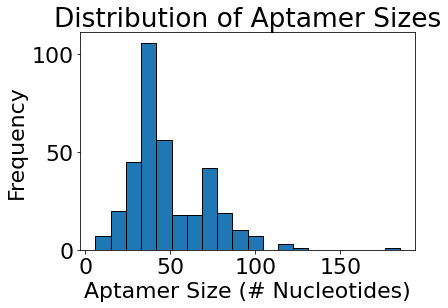

In [11]:
length = []
for sequence in sequences:
    length.append(len(sequence))
fig, axs = plt.subplots()
axs.hist(length, bins=20, histtype='bar', ec='black')
plt.title('Distribution of Aptamer Sizes')
plt.xlabel('Aptamer Size (# Nucleotides)')
plt.ylabel('Frequency')

Filter aptamer structures (between 10 and 100 nucleotides) and divide into buckets of different lengths

In [6]:
aptamer_benchmark_structures = set()
for sequence in sequences:
    if len(sequence) >= 10 and len(sequence) <100:
        nupack_structure, _ = nupack_analyze_sequence(sequence)
        aptamer_benchmark_structures.add(nupack_structure)
aptamer_benchmark_structures = list(aptamer_benchmark_structures)

structure_buckets = {
    30: [],
    35: [],
    40: [],
    50: [],
    60: [],
    80: [],
    100: []
}
for structure in aptamer_benchmark_structures:
    if len(structure) < 30:
        structure_buckets[30].append(structure)
    elif len(structure) < 35:
        structure_buckets[35].append(structure)
    elif len(structure) < 40:
        structure_buckets[40].append(structure)
    elif len(structure) < 50:
        structure_buckets[50].append(structure)
    elif len(structure) < 60:
        structure_buckets[60].append(structure)
    elif len(structure) < 80:
        structure_buckets[80].append(structure)
    elif len(structure) < 100:
        structure_buckets[100].append(structure)
    else:
        print('Something went wrong!')

In [16]:
for i in range(3):
    print('-------------------------------------')
    print(f'Round {i}')
    print('-------------------------------------')
    correct_list = []
    total_list = []
    average_iterations = []
    dict_key = [30, 35, 40, 50, 60, 80, 100]
    for key in dict_key:
        correct = 0
        iterations = []
        total_list.append(len(structure_buckets[key]))
        for target_structure in structure_buckets[key]:
            _, random_sequence = initialize_sequences(target_structure, 100)
            nupack_structure, _ = nupack_analyze_sequence(random_sequence)
            result = mutate_sequence_iterate(random_sequence, target_structure, nupack_structure, 100)
            if result['success']:
                correct += 1
                iterations.append(result['iteration'])
        correct_list.append(correct)
        average_iterations.append(statistics.median(iterations))
    accuracies = [i/j for i, j in zip(correct_list, total_list)]
    print('Nucleotide size upper bounds:', dict_key)
    print('Accuracies for each bucket:', accuracies)
    print('Median iteration values:', average_iterations)

-------------------------------------
Round 0
-------------------------------------
Nucleotide size upper bounds: [30, 35, 40, 50, 60, 80, 100]
Accuracies for each bucket: [0.9230769230769231, 0.9210526315789473, 0.9803921568627451, 0.7966101694915254, 0.8958333333333334, 0.8064516129032258, 0.75]
Median iteration values: [0.0, 0, 0.0, 0, 0, 1.5, 7.0]
-------------------------------------
Round 1
-------------------------------------
Nucleotide size upper bounds: [30, 35, 40, 50, 60, 80, 100]
Accuracies for each bucket: [0.9615384615384616, 0.868421052631579, 0.9803921568627451, 0.8135593220338984, 0.8541666666666666, 0.8709677419354839, 0.6875]
Median iteration values: [0, 0, 0.0, 0.0, 0, 2.0, 9.0]
-------------------------------------
Round 2
-------------------------------------
Nucleotide size upper bounds: [30, 35, 40, 50, 60, 80, 100]
Accuracies for each bucket: [0.9615384615384616, 0.8157894736842105, 0.9215686274509803, 0.847457627118644, 0.8333333333333334, 0.8870967741935484,

In [11]:
for i in range(2):
    correct_list = []
    total_list = []
    average_iterations = []
    dict_key = [30, 35, 40, 50, 60, 80, 100]
    for key in dict_key:
        correct = 0
        current = 0
        iterations = []
        total_list.append(len(structure_buckets[key]))
        for target_structure in structure_buckets[key]:
            _, random_sequence = initialize_sequences(target_structure, 100)
            nupack_structure, _ = nupack_analyze_sequence(random_sequence)
            result = mutate_sequence_iterate(random_sequence, target_structure, nupack_structure, 100)
            current += 1
            print('Current bucket', key, '/ Current structure:', current, 'of', len(structure_buckets[key]), end='\r')
            if result['success']:
                correct += 1
                iterations.append(result['iteration'])
        correct_list.append(correct)
        average_iterations.append(statistics.median(iterations))
    accuracies = [i/j for i, j in zip(correct_list, total_list)]
    print('Nucleotide size upper bounds:', dict_key)
    print('Accuracies for each bucket:', correct_list)
    print('Median iteration values:', average_iterations)

Nucleotide size upper bounds: [30, 35, 40, 50, 60, 80, 100]
Accuracies for each bucket: [26, 30, 44, 49, 43, 49, 23]
Median iteration values: [0.0, 0.0, 0.0, 0, 0, 1, 11]
Nucleotide size upper bounds: [30, 35, 40, 50, 60, 80, 100]
Accuracies for each bucket: [25, 34, 50, 50, 43, 52, 20]
Median iteration values: [0, 0.0, 0.0, 0.0, 0, 1.0, 1.5]
